In [1]:
import os
from glob import glob

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import median_abs_deviation

from astroquery.mast import Observations
from astropy.io import fits
from ginga.util.zscale import zscale

import wfc3_module

In [2]:
paths = sorted(glob('example_csvs/*'))
targets = ['GD153', 'OMEGACEN', 'NGC-2020', 'JUPITER']

In [3]:
paths

['example_csvs/ex1ai-query_results-corrected.csv',
 'example_csvs/ex1aii-query_results.csv',
 'example_csvs/ex1aiii-query_results-5.csv',
 'example_csvs/ex2_query_results_jupiter.csv']

In [16]:
ind = 1
file = paths[ind]
target = targets[ind]

In [17]:
df = pd.read_csv(file)

In [18]:
df

,id,rootname,filter,expstart,targname
0,357911,iem405a3q,F160W,59596.03906,OMEGACEN
1,357912,iem406a5q,F160W,59596.05078,OMEGACEN
2,357913,iem404a1q,F160W,59596.02344,OMEGACEN
3,370295,iem416kfq,F160W,59756.06641,OMEGACEN
4,370298,iem418kjq,F160W,59756.09766,OMEGACEN
5,370299,iem417khq,F160W,59756.08203,OMEGACEN


In [19]:
obs_id = df['rootname'].iloc[0]
filt = df['filter'].iloc[0]

In [20]:
obs_id, filt

('iem405a3q', 'F160W')

In [21]:
obs = wfc3_module.get_obs_from_query_criteria_wildcard(obs_id, filt)

In [22]:
obs

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
str7,str3,str6,str7,str3,str5,str8,str8,str47,str9,float64,float64,str5,str23,int64,float64,float64,float64,float64,float64,str33,float64,str5,str8,int64,str202,str34,str35,str6,bool,float64,str8,str9
science,HST,CALWF3,WFC3/IR,HST,F160W,Infrared,OMEGACEN,CALIBRATION;ASTROMETRIC;SPATIAL DISTORTION TEST,iem405a3q,201.6928333333,-47.47905555556,image,"Kozhurina-Platais, Vera",3,59596.03812800926,59596.04105543981,252.937439,1393.8999999999999,1692.4,WFC3 Astrometric Scale Monitoring,59596.09702548,16588,CAL/WFC3,--,POLYGON 201.65344587500573 -47.469847678843266 201.70554562801007 -47.455176060706776 201.72521788980617 -47.486613798266774 201.67309244149868 -47.501294323020886 201.65344587500573 -47.469847678843266,mast:HST/product/iem405a3q_drz.jpg,mast:HST/product/iem405a3q_drz.fits,PUBLIC,False,nan,71366424,139515519


In [23]:
prods = Observations.get_product_list(obs)

In [24]:
prods

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str8,str3,str5,str9,str62,str1,str40,str9,str28,str8,str1,str6,str19,str5,str23,int64,str8,str6,int64
71366424,HST,image,iem405a3q,DADS FLT_HLET,S,mast:HST/product/iem405a3q_flt_hlet.fits,AUXILIARY,--,FLT_HLET,--,CALWF3,3.6.2 (May-27-2021),16588,iem405a3q_flt_hlet.fits,8640,71366424,PUBLIC,2
71366424,HST,image,iem405a3q,DADS IMA file - Intermediate Mult-Accum WFC3/NICMOS,S,mast:HST/product/iem405a3q_ima.fits,AUXILIARY,--,IMA,--,CALWF3,3.6.2 (May-27-2021),16588,iem405a3q_ima.fits,126201600,71366424,PUBLIC,2
71366424,HST,image,iem405a3q,DADS JIF file,S,mast:HST/product/iem405a3j_jif.fits,AUXILIARY,--,JIF,--,CALWF3,--,16588,iem405a3j_jif.fits,34560,71366424,PUBLIC,1
71366424,HST,image,iem405a3q,DADS JIT file,S,mast:HST/product/iem405a3j_jit.fits,AUXILIARY,--,JIT,--,CALWF3,--,16588,iem405a3j_jit.fits,23040,71366424,PUBLIC,1
71366424,HST,image,iem405a3q,DADS SPT file - Engineering telemetry ACS/WFC3/NICMOS/COS/STIS,S,mast:HST/product/iem405a3q_spt.fits,AUXILIARY,--,SPT,--,CALWF3,--,16588,iem405a3q_spt.fits,927360,71366424,PUBLIC,1
71366424,HST,image,iem405a3q,DADS TRL file - Processing log,S,mast:HST/product/iem405a3q_trl.fits,AUXILIARY,--,TRL,--,CALWF3,--,16588,iem405a3q_trl.fits,313920,71366424,PUBLIC,1
71366424,HST,image,iem405a3q,DADS LOG file,S,mast:HST/product/iem405a3q_log.txt,INFO,--,LOG,--,CALWF3,--,16588,iem405a3q_log.txt,117885,71366424,PUBLIC,1
71366424,HST,image,iem405a3q,Preview-Full,S,mast:HST/product/iem405a3q_raw.jpg,PREVIEW,--,--,--,CALWF3,--,16588,iem405a3q_raw.jpg,361277,71366424,PUBLIC,1
71366424,HST,image,iem405a3q,Preview-Full,S,mast:HST/product/iem405a3q_drz.jpg,PREVIEW,--,--,--,CALWF3,3.6.2 (May-27-2021),16588,iem405a3q_drz.jpg,147899,71366424,PUBLIC,3


In [10]:
wfc3_module.download_raw_flt_fits(obs, obs_id)

In [11]:
data = wfc3_module.get_raw_flt_data(obs_id)

In [12]:
data_sci = data[1]

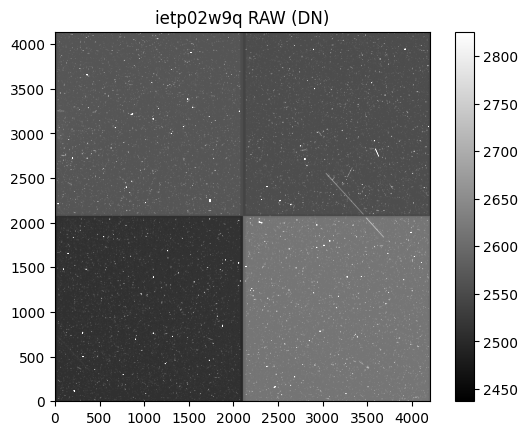

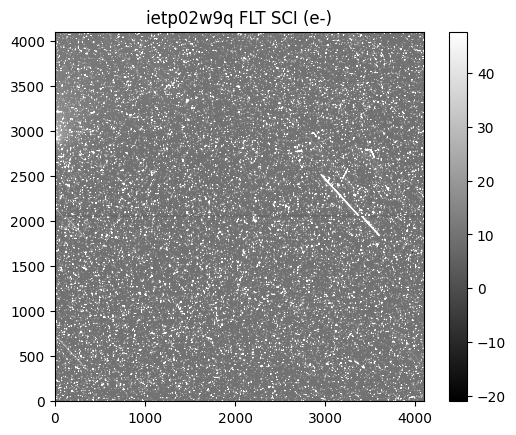

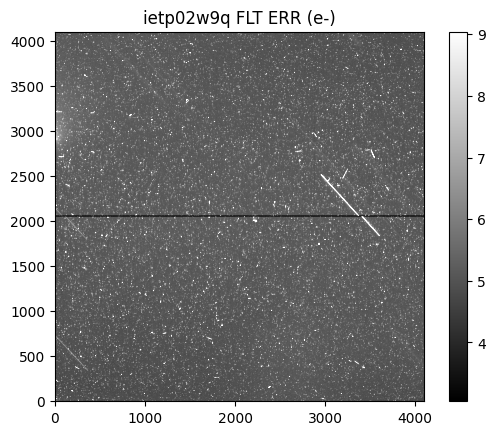

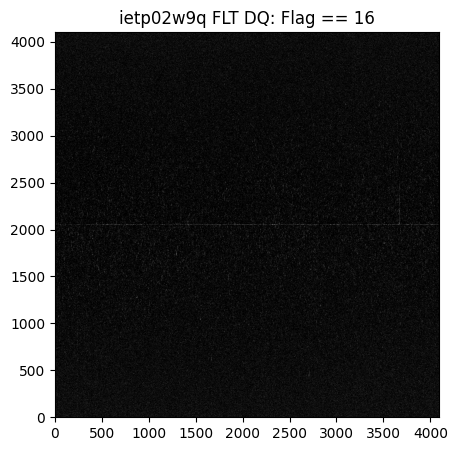

In [13]:
wfc3_module.plot_images(obs_id, data, 16)

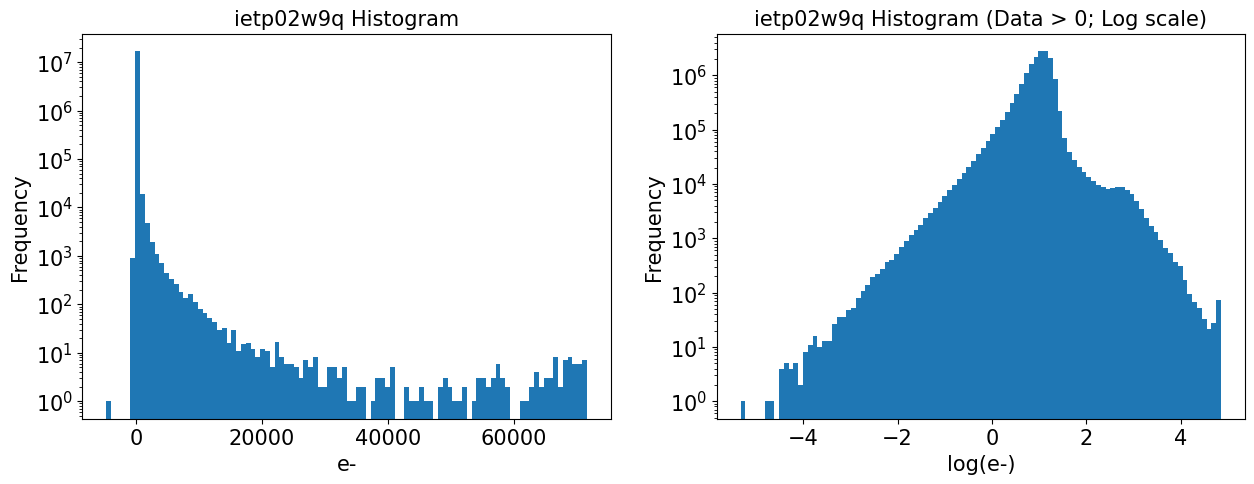

In [14]:
wfc3_module.plot_histograms(obs_id, data_sci)

3.629% of pixels are less than 0


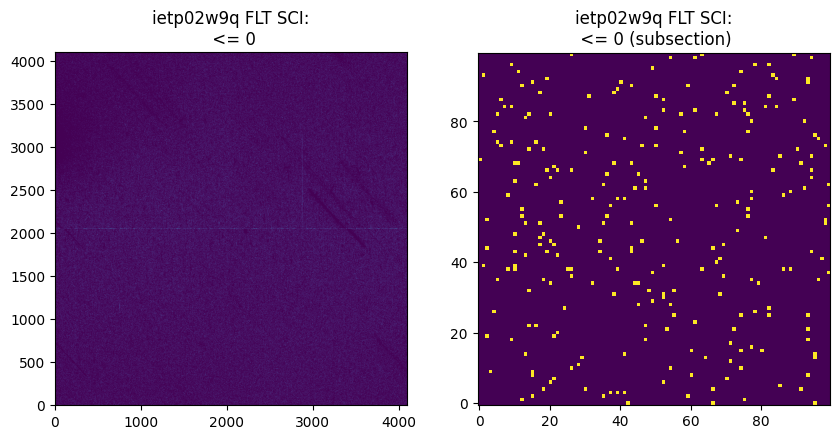

In [15]:
wfc3_module.plot_sci_lt_0(obs_id, data_sci)

In [16]:
data_sci_stats = wfc3_module.get_stats(obs_id, data_sci)